# 1- Importing all the libraries needed

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')




# Context 

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [2]:
df=pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# 2-Data Analysis

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

So, as we can see here the object data has been converted to string

## -Getting the categorical columns 

In [6]:
string_col=df.select_dtypes("string").columns.to_list()

In [7]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [8]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

# The Attributess include:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [9]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [10]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [11]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [12]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 2160x2160 with 0 Axes>

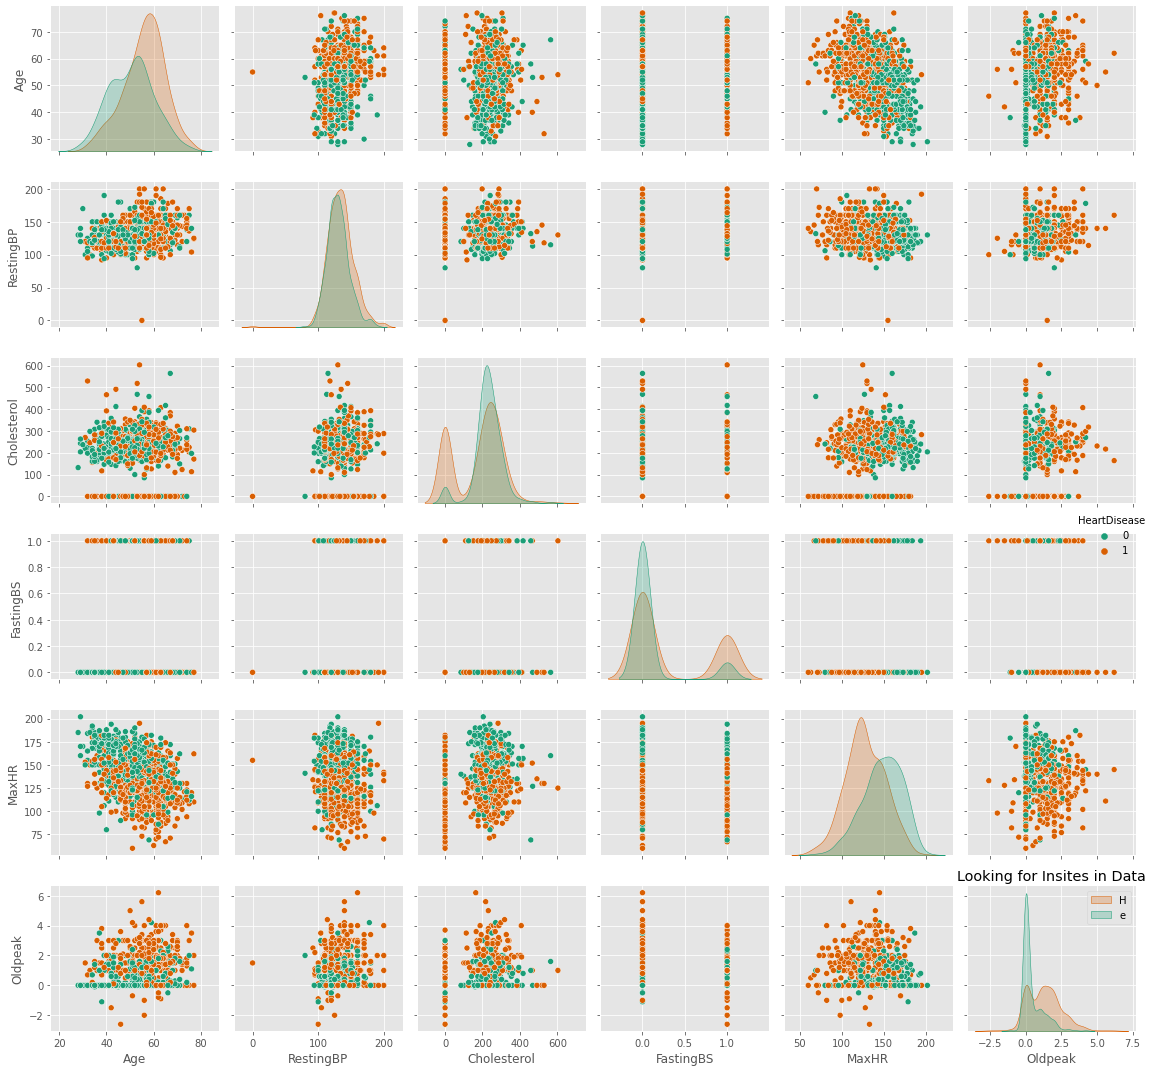

In [13]:
plt.figure(figsize=(30,30))
sns.pairplot(df,hue="HeartDisease",palette= 'Dark2')
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()


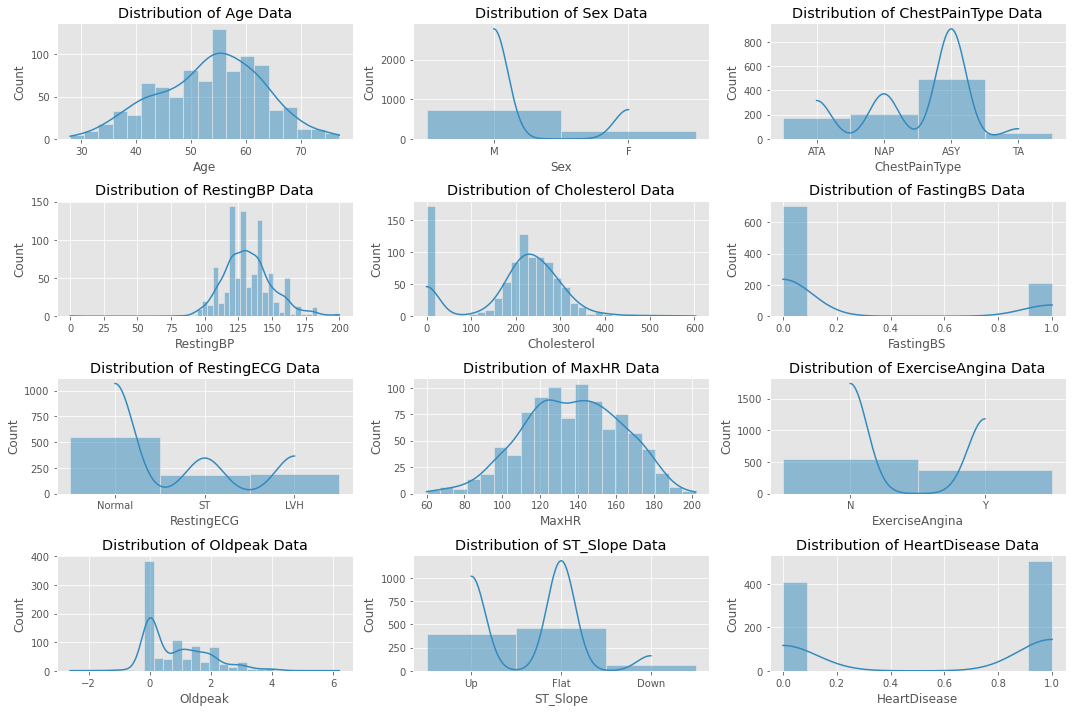

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    


In [15]:

fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [16]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [17]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [18]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [19]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

# 3-Data Preprocessing


#  Handling Null and Missing Values : 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [21]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# No null vlaues

In [22]:
for l in df.columns:
    count = (df[l] == 0).sum()
    print (l ,'   ',  count)


Age     0
Sex     0
ChestPainType     0
RestingBP     1
Cholesterol     172
FastingBS     704
RestingECG     0
MaxHR     0
ExerciseAngina     0
Oldpeak     368
ST_Slope     0
HeartDisease     410


# Checking for Missing values replacing technique

## reducing features and extracing new usefull features 

#1st , binning

In [23]:
##Age_Binning

In [24]:
df_Bin=df

In [25]:
# Allocate Age to bins
age_Group = pd.cut(df_Bin["Age"], bins = [0,35,60,80], labels = ["Adults","MiddleAged","OldAdults"])

# Add the binned values as a new categorical feature
df_Bin["Age_G"] = age_Group

df_Bin = df_Bin.drop('Age', axis=1)

In [26]:
df_Bin.head()

Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   M           ATA        140          289          0     Normal    172   
1   F           NAP        160          180          0     Normal    156   
2   M           ATA        130          283          0         ST     98   
3   F           ASY        138          214          0     Normal    108   
4   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease       Age_G  
0              N      0.0       Up             0  MiddleAged  
1              N      1.0     Flat             1  MiddleAged  
2              N      0.0       Up             0  MiddleAged  
3              Y      1.5     Flat             1  MiddleAged  
4              N      0.0       Up             0  MiddleAged

In [27]:
BP_Group = pd.cut(df_Bin["RestingBP"], bins = [-1,110,140,500], labels = ["Low","Normal","High"])

# Add the binned values as a new categorical feature
df_Bin["RestingBP_G"] = BP_Group

df_Bin = df_Bin.drop('RestingBP', axis=1)




In [28]:
df_Bin.head()

Sex ChestPainType  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  \
0   M           ATA          289          0     Normal    172              N   
1   F           NAP          180          0     Normal    156              N   
2   M           ATA          283          0         ST     98              N   
3   F           ASY          214          0     Normal    108              Y   
4   M           NAP          195          0     Normal    122              N   

   Oldpeak ST_Slope  HeartDisease       Age_G RestingBP_G  
0      0.0       Up             0  MiddleAged      Normal  
1      1.0     Flat             1  MiddleAged        High  
2      0.0       Up             0  MiddleAged      Normal  
3      1.5     Flat             1  MiddleAged      Normal  
4      0.0       Up             0  MiddleAged        High

In [29]:
df_Bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             918 non-null    string  
 1   ChestPainType   918 non-null    string  
 2   Cholesterol     918 non-null    int64   
 3   FastingBS       918 non-null    int64   
 4   RestingECG      918 non-null    string  
 5   MaxHR           918 non-null    int64   
 6   ExerciseAngina  918 non-null    string  
 7   Oldpeak         918 non-null    float64 
 8   ST_Slope        918 non-null    string  
 9   HeartDisease    918 non-null    int64   
 10  Age_G           918 non-null    category
 11  RestingBP_G     918 non-null    category
dtypes: category(2), float64(1), int64(4), string(5)
memory usage: 73.9 KB


In [30]:
df_Ch=pd.get_dummies(df_Bin,drop_first=False)
df_Ch.head()


Sex ChestPainType  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  \
0   M           ATA          289          0     Normal    172              N   
1   F           NAP          180          0     Normal    156              N   
2   M           ATA          283          0         ST     98              N   
3   F           ASY          214          0     Normal    108              Y   
4   M           NAP          195          0     Normal    122              N   

   Oldpeak ST_Slope  HeartDisease  Age_G_Adults  Age_G_MiddleAged  \
0      0.0       Up             0             0                 1   
1      1.0     Flat             1             0                 1   
2      0.0       Up             0             0                 1   
3      1.5     Flat             1             0                 1   
4      0.0       Up             0             0                 1   

   Age_G_OldAdults  RestingBP_G_Low  RestingBP_G_Normal  RestingBP_G_High  
0                0                0                   1                 0  
1                0                0                   0                 1  
2                0                0                   1                 0  
3                0                0                   1                 0  
4                0                0                   0                 1

In [31]:
df_Ch = df_Ch[~(df.Cholesterol ==0 )]

In [32]:
px.imshow(df_Ch.corr(),title="Checking for any strong realtions with Cholesterol")

#there are no strong relations to use to try and fill the missing values of Cholesterol so we use the mean value 

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(df[['Cholesterol']])
df_Bin['Cholesterol'] = imputer.transform(df[['Cholesterol']])


[]

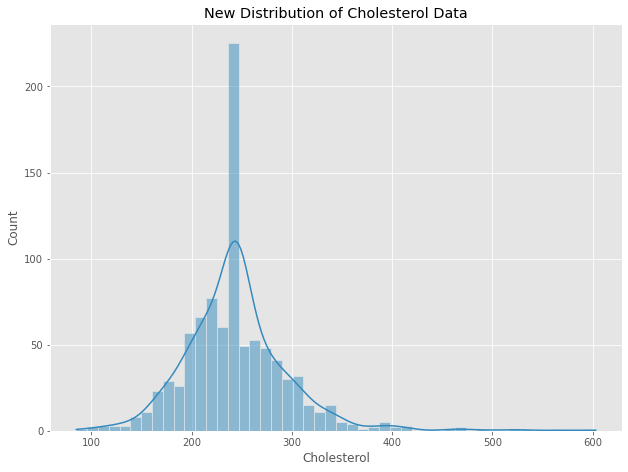

In [34]:
plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
plt.title(f"New Distribution of Cholesterol Data")
sns.histplot(df_Bin['Cholesterol'],kde=True)
plt.tight_layout()
plt.plot()

In [35]:
Chol_Group = pd.cut(df_Bin["Cholesterol"], bins = [0,200,800], labels = ["Normal","High"])

# Add the binned values as a new categorical feature
df_Bin["Cholesterol_G"] = Chol_Group

df_Bin = df_Bin.drop('Cholesterol', axis=1)

In [36]:
df_Bin.head()

Sex ChestPainType  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak  \
0   M           ATA          0     Normal    172              N      0.0   
1   F           NAP          0     Normal    156              N      1.0   
2   M           ATA          0         ST     98              N      0.0   
3   F           ASY          0     Normal    108              Y      1.5   
4   M           NAP          0     Normal    122              N      0.0   

  ST_Slope  HeartDisease       Age_G RestingBP_G Cholesterol_G  
0       Up             0  MiddleAged      Normal          High  
1     Flat             1  MiddleAged        High        Normal  
2       Up             0  MiddleAged      Normal          High  
3     Flat             1  MiddleAged      Normal          High  
4       Up             0  MiddleAged        High        Normal

In [37]:
MaxHR_Group = pd.cut(df_Bin["MaxHR"], bins = [0,150,200,300], labels = ["Low","Normal","High"])

# Add the binned values as a new categorical feature
df_Bin["MaxHR_G"] = MaxHR_Group

df_Bin = df_Bin.drop('MaxHR', axis=1)

In [38]:
# Checking for NULLs in the data
df_Bin.isnull().sum()


Sex               0
ChestPainType     0
FastingBS         0
RestingECG        0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Age_G             0
RestingBP_G       0
Cholesterol_G     0
MaxHR_G           0
dtype: int64

So we can see our data does not have any null values
but we had missing values in Cholestrol, so replaced them by their mean value which is 244.

Cholesterol Relation was - 0.2 and now is 0.0

As it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss, So we used imputation:

Imputation is simply the process of substituting the missing values of our dataset.


# Feature Scaling


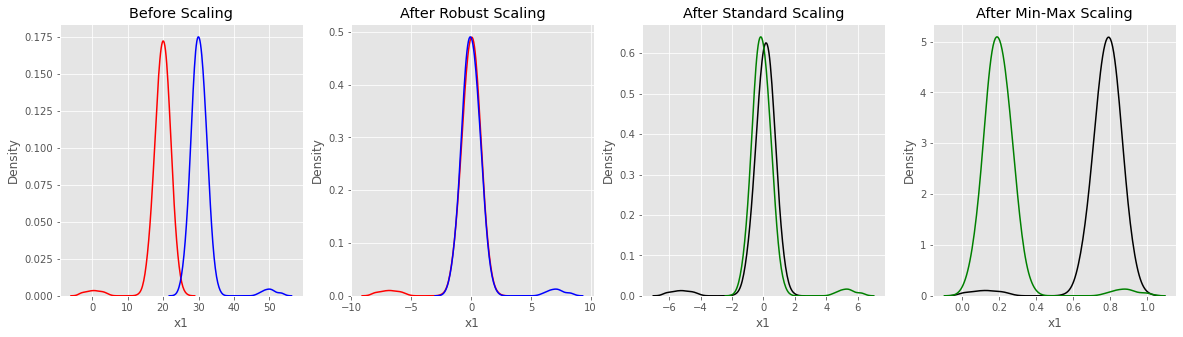

In [39]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

# Handling Categorical Variables



In [40]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [41]:
## Creaeting one hot encoded features for working with non tree based algorithms 
df_Copy=pd.get_dummies(df_Bin,columns=string_col, drop_first=False)
df_Copy=pd.get_dummies(df_Copy, drop_first=False)

df_Copy.head()


FastingBS  Oldpeak  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  \
0          0      0.0             0      0      1                  0   
1          0      1.0             1      1      0                  0   
2          0      0.0             0      0      1                  0   
3          0      1.5             1      1      0                  1   
4          0      0.0             0      0      1                  0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0                  1                  0                 0               0   
1                  0                  1                 0               0   
2                  1                  0                 0               0   
3                  0                  0                 0               0   
4                  0                  1                 0               0   

   ...  Age_G_MiddleAged  Age_G_OldAdults  RestingBP_G_Low  \
0  ...                 1                0                0   
1  ...                 1                0                0   
2  ...                 1                0                0   
3  ...                 1                0                0   
4  ...                 1                0                0   

   RestingBP_G_Normal  RestingBP_G_High  Cholesterol_G_Normal  \
0                   1                 0                     0   
1                   0                 1                     1   
2                   1                 0                     0   
3                   1                 0                     0   
4                   0                 1                     1   

   Cholesterol_G_High  MaxHR_G_Low  MaxHR_G_Normal  MaxHR_G_High  
0                   1            0               1             0  
1                   0            0               1             0  
2                   1            1               0             0  
3                   1            1               0             0  
4                   0            1               0             0  

[5 rows x 28 columns]

In [42]:
px.imshow(df_Copy.corr(),title="Correlation Plot of the Heat Failure Prediction",width = 1000, height = 1000)

In [43]:
# Getting the target column at the end
target="HeartDisease"
y=df_Copy[target].values
df_ = df_Copy.drop("HeartDisease",axis=1,inplace=False)
df_




FastingBS  Oldpeak  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  \
0            0      0.0      0      1                  0                  1   
1            0      1.0      1      0                  0                  0   
2            0      0.0      0      1                  0                  1   
3            0      1.5      1      0                  1                  0   
4            0      0.0      0      1                  0                  0   
5            0      0.0      0      1                  0                  0   
6            0      0.0      1      0                  0                  1   
7            0      0.0      0      1                  0                  1   
8            0      1.5      0      1                  1                  0   
9            0      0.0      1      0                  0                  1   
10           0      0.0      1      0                  0                  0   
11           0      2.0      0      1                  0                  1   
12           0      0.0      0      1                  0                  1   
13           0      1.0      0      1                  1                  0   
14           0      0.0      1      0                  0                  0   
15           0      1.5      1      0                  0                  1   
16           0      0.0      0      1                  1                  0   
17           0      0.0      1      0                  0                  1   
18           0      1.0      0      1                  1                  0   
19           0      3.0      0      1                  0                  1   
20           0      0.0      1      0                  0                  0   
21           0      1.0      0      1                  0                  1   
22           0      0.0      1      0                  0                  1   
23           0      3.0      0      1                  0                  1   
24           0      0.0      0      1                  0                  0   
25           0      0.0      0      1                  0                  0   
26           0      3.0      0      1                  1                  0   
27           0      0.0      0      1                  0                  1   
28           0      0.0      1      0                  0                  1   
29           0      0.0      0      1                  0                  1   
30           0      0.0      0      1                  0                  0   
31           0      0.0      0      1                  0                  0   
32           0      2.0      0      1                  1                  0   
33           0      2.0      0      1                  1                  0   
34           0      0.0      1      0                  0                  1   
35           0      0.0      0      1                  0                  1   
36           1      1.5      0      1                  1                  0   
37           0      0.0      1      0                  0                  1   
38           1      0.0      1      0                  0                  1   
39           0      1.0      1      0                  1                  0   
40           0      0.0      1      0                  0                  1   
41           0      0.0      1      0                  0                  0   
42           0      0.0      0      1                  0                  1   
43           0      0.0      0      1                  0                  0   
44           0      1.0      0      1                  1                  0   
45           0      1.0      0      1                  0                  0   
46           0      0.0      0      1                  1                  0   
47           0      0.0      0      1                  0                  1   
48           0      1.0      0      1                  0                  0   
49           0      0.0      0      1                  

# Chossing the right Cross-Validation



##  Stratified k-fold cross-validation :

If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.


<br>
​
<img src="https://i.stack.imgur.com/8uEci.png" width=50%>
<br>
​

# Training our Machine Learning Model : 


So as have talked earlier we have to use differnt ways to works with categorical data, so we will be using different methods:

## 1.Using Logistic Regression : 



In [82]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]


kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
     
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold+1} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
    
avr_Acc =np.mean(acc_log) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')


The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.93      0.87      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

The accuracy for Fold 1 : 0.8933185536273985
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       103
           1       0.88      0.90      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

The accuracy for Fold 2 : 0.871148994725174
The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.96      0.71      0.81       102
           1       0.81      0.98      0.88       127

    accuracy                        

## 2.Using Naive Bayes



In [80]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_Gauss) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       103
           1       0.82      0.91      0.86       127

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230

The accuracy for 1 : 0.8265423132788012
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       103
           1       0.78      0.98      0.87       127

    accuracy                           0.83       230
   macro avg       0.87      0.82      0.82       230
weighted avg       0.86      0.83      0.83       230

The accuracy for 2 : 0.8182860637565935
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.41      0.58       102
           1       0.68      0.99      0.81       127

    accuracy                           0.73  

## 3.Using SVM(Support Vector Machines):

- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized.

In [76]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_svm) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       103
           1       0.93      0.91      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

The accuracy for 1 : 0.9130035929974774
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       103
           1       0.88      0.91      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

The accuracy for 2 : 0.8750860025991898
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       102
           1       0.79      0.98      0.88       127

    accuracy                           0.85  

In [75]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_svm_sig) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.91      0.84      0.87       127

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230

The accuracy for 1 : 0.8678617842672579
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       103
           1       0.87      0.89      0.88       127

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230

The accuracy for 2 : 0.8623576179191192
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       102
           1       0.78      0.97      0.87       127

    accuracy                           0.83  

In [74]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_svm_rbf) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       103
           1       0.93      0.93      0.93       127

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230

The accuracy for 1 : 0.920877608745509
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       103
           1       0.88      0.93      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

The accuracy for 2 : 0.886897026221237
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       102
           1       0.78      0.98      0.87       127

    accuracy                           0.83    

In [72]:
## Using Polynomial kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_svm_poly) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       103
           1       0.90      0.94      0.92       127

    accuracy                           0.91       230
   macro avg       0.92      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

The accuracy for 1 : 0.909334148765385
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       103
           1       0.85      0.91      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230

The accuracy for 2 : 0.8508141579389955
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       102
           1       0.77      0.96      0.86       127

    accuracy                           0.82   

# 4-Using K-nearest Neighbors


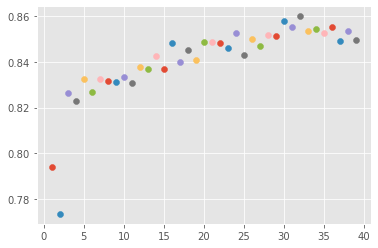

In [50]:
from sklearn.neighbors import KNeighborsClassifier

for i in range ( 1 ,40 ):
    
    acc_KNN=[]
    kf=model_selection.StratifiedKFold(n_splits=4)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
        X_train=df_.loc[trn_,df_.columns.to_list()]
        y_train=df_Copy.loc[trn_,target]

        X_valid=df_.loc[val_,df_.columns.to_list()]
        y_valid=df_Copy.loc[val_,target]

        ro_scaler=StandardScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_valid=ro_scaler.transform(X_valid)

        clf=KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_valid)
        #print(f"The fold is : {fold} : ")
        #print(classification_report(y_valid,y_pred))
        acc=roc_auc_score(y_valid,y_pred)
        acc_KNN.append(acc)
        #print(f"The accuracy for {fold+1} : {acc}")
    
    

    avr_Acc =np.mean(acc_KNN) 
    
    plt.scatter(i,avr_Acc)
    acc_KNN.clear()
    
    

In [71]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    ro_scaler=StandardScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    

avr_Acc =np.mean(acc_KNN) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       103
           1       0.93      0.91      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

The accuracy for 1 : 0.9090665851234615
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       103
           1       0.88      0.90      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

The accuracy for 2 : 0.8760033636572128
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       102
           1       0.82      0.98      0.89       127

    accuracy                           0.86  

## 5-Using Decision tree Classifier


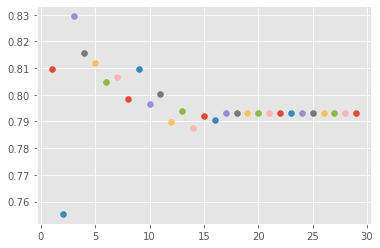

In [52]:
from sklearn.tree import DecisionTreeClassifier
for i in range ( 1, 30):
    acc_Dtree=[]
    kf=model_selection.StratifiedKFold(n_splits=4)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
        X_train=df_.loc[trn_,df_.columns.to_list()]
        y_train=df_Copy.loc[trn_,target]

        X_valid=df_.loc[val_,df_.columns.to_list()]
        y_valid=df_Copy.loc[val_,target]

        clf=DecisionTreeClassifier(criterion="entropy",max_depth = i,random_state=42)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_valid)
        acc=roc_auc_score(y_valid,y_pred)
        acc_Dtree.append(acc)

    avr_Acc =np.mean(acc_Dtree) 
    plt.scatter(i ,avr_Acc )
    acc_Dtree.clear()

In [70]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy",max_depth = 9,random_state=42)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
avr_Acc =np.mean(acc_Dtree) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')    

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       103
           1       0.92      0.88      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

The accuracy for 1 : 0.8924011925693754
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       103
           1       0.88      0.86      0.87       127

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

The accuracy for 2 : 0.8563183242871341
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       102
           1       0.73      0.91      0.81       127

    accuracy                           0.76  

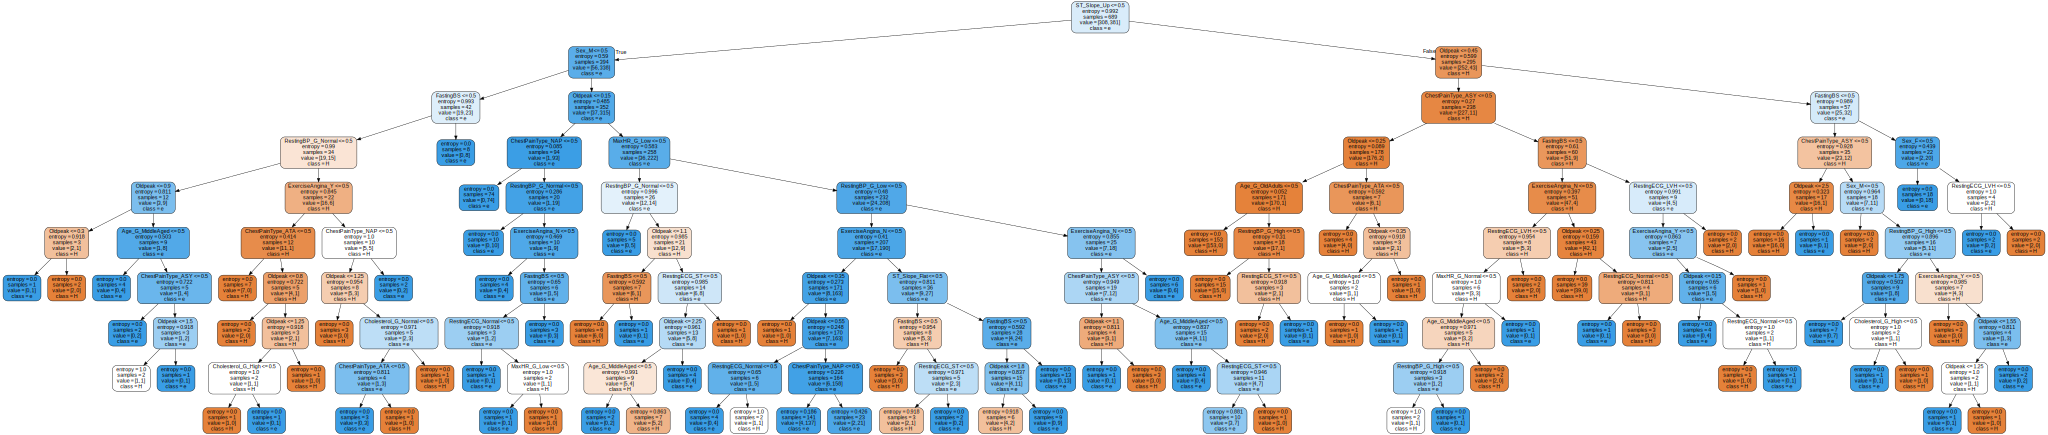

In [54]:
import graphviz

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { width: 100em; }</style>"))

from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df_.columns.to_list(),  
                                class_names=target,
                                filled=True,rounded = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png", engine='dot') 
graph

# 6-Using Random Forest Classifier



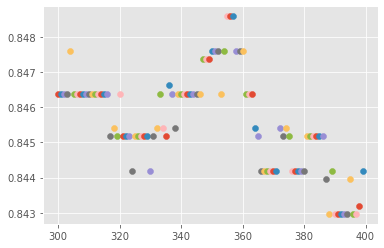

In [55]:
from sklearn.ensemble import RandomForestClassifier

for i in range (300 , 400):
    acc_RandF=[]
    kf=model_selection.StratifiedKFold(n_splits=4)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):

        X_train=df_.loc[trn_,df_.columns.to_list()]
        y_train=df_Copy.loc[trn_,target]

        X_valid=df_.loc[val_,df_.columns.to_list()]
        y_valid=df_Copy.loc[val_,target]

        clf=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state = 42)

        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_valid)
        acc=roc_auc_score(y_valid,y_pred)
        acc_RandF.append(acc)

    avr_Acc =np.mean(acc_RandF) 
    plt.scatter(i ,avr_Acc )
    acc_RandF.clear()


In [69]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=355,criterion="entropy",random_state = 42)
    
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

avr_Acc =np.mean(acc_RandF) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       103
           1       0.92      0.94      0.93       127

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230

The accuracy for 1 : 0.9151058787554469
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       103
           1       0.89      0.91      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.89      0.89      0.89       230

The accuracy for 2 : 0.8847947404632674
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       102
           1       0.79      0.98      0.88       127

    accuracy                           0.85  

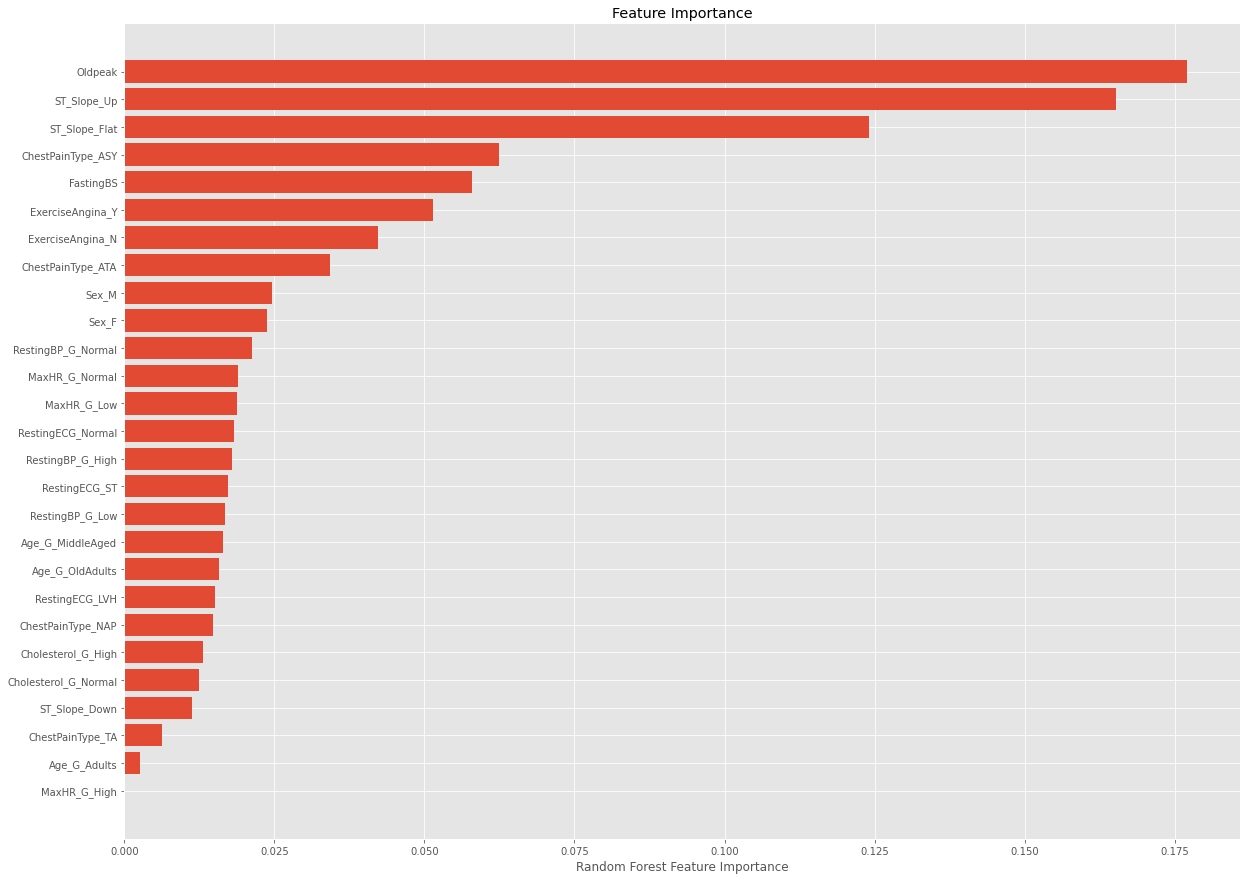

In [57]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[df_.columns.to_list()[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

## 7-Using XGBoost


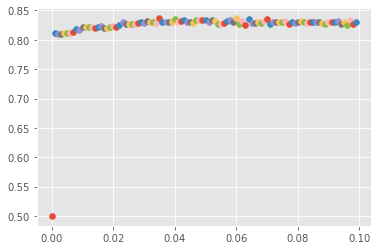

In [58]:
from xgboost import XGBClassifier
for i in np.arange ( 0 , 0.1 , 0.001):
    
    acc_XGB=[]
    
    acc_mean=0
    kf=model_selection.StratifiedKFold(n_splits=4)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):

        X_train=df_.loc[trn_,df_.columns.to_list()]
        y_train=df_Copy.loc[trn_,target]

        X_valid=df_.loc[val_,df_.columns.to_list()]
        y_valid=df_Copy.loc[val_,target]

        clf=XGBClassifier(eval_metric='mlogloss',learning_rate=i)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_valid)
        acc=roc_auc_score(y_valid,y_pred)
        acc_XGB.append(acc)


    avr_Acc =np.mean(acc_XGB) 
    plt.scatter(i ,avr_Acc )
    acc_XGB.clear()


In [68]:
from xgboost import XGBClassifier
acc_XGB=[]
acc_mean=0
kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):
    
    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]
    
    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]
    
    clf=XGBClassifier(eval_metric='mlogloss',learning_rate=0.035)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold+1} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}" )
  

avr_Acc =np.mean(acc_XGB) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       103
           1       0.93      0.91      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

The accuracy for 1 : 0.9090665851234615
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       103
           1       0.90      0.91      0.90       127

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

The accuracy for 2 : 0.8896491093953063
The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       102
           1       0.77      0.95      0.85       127

    accuracy                           0.82  

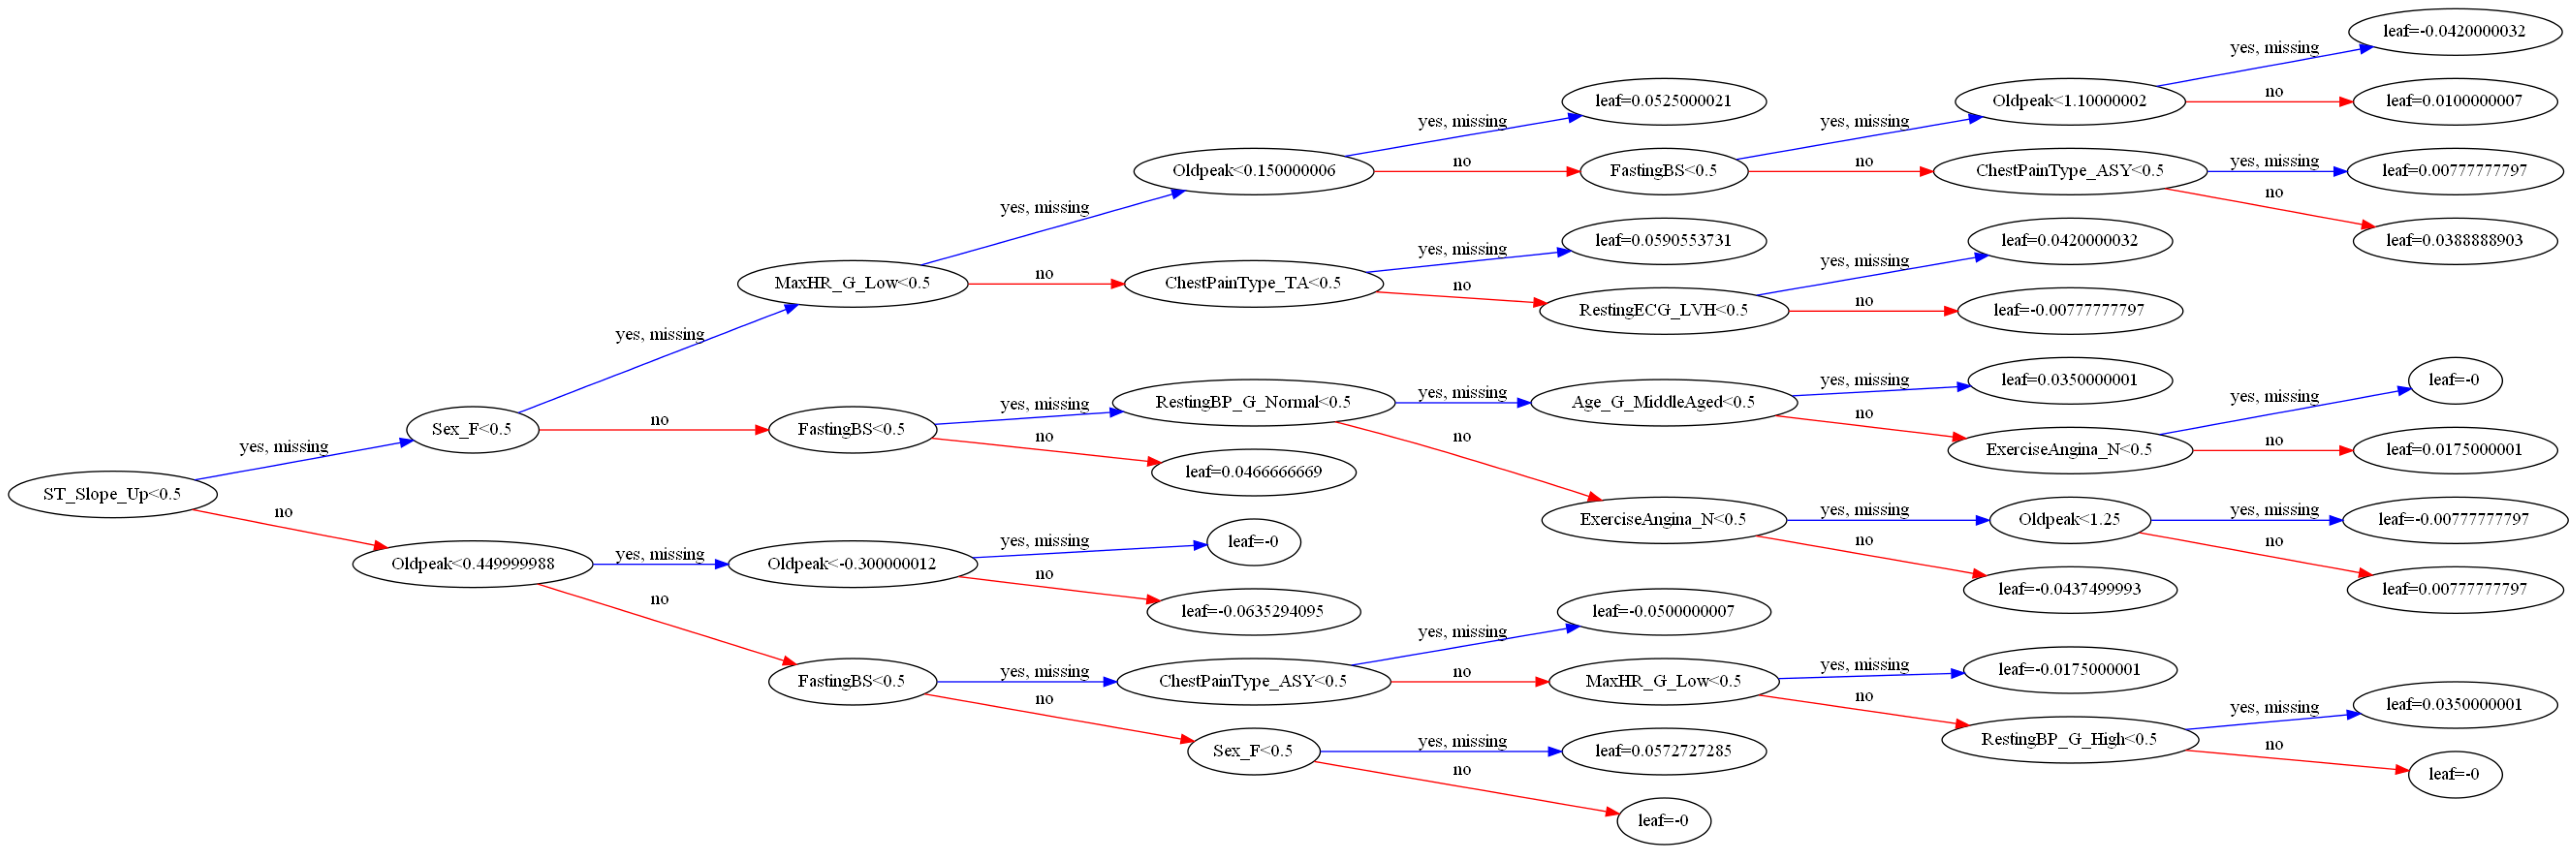

In [60]:
fig, ax = plt.subplots(figsize=(100, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()

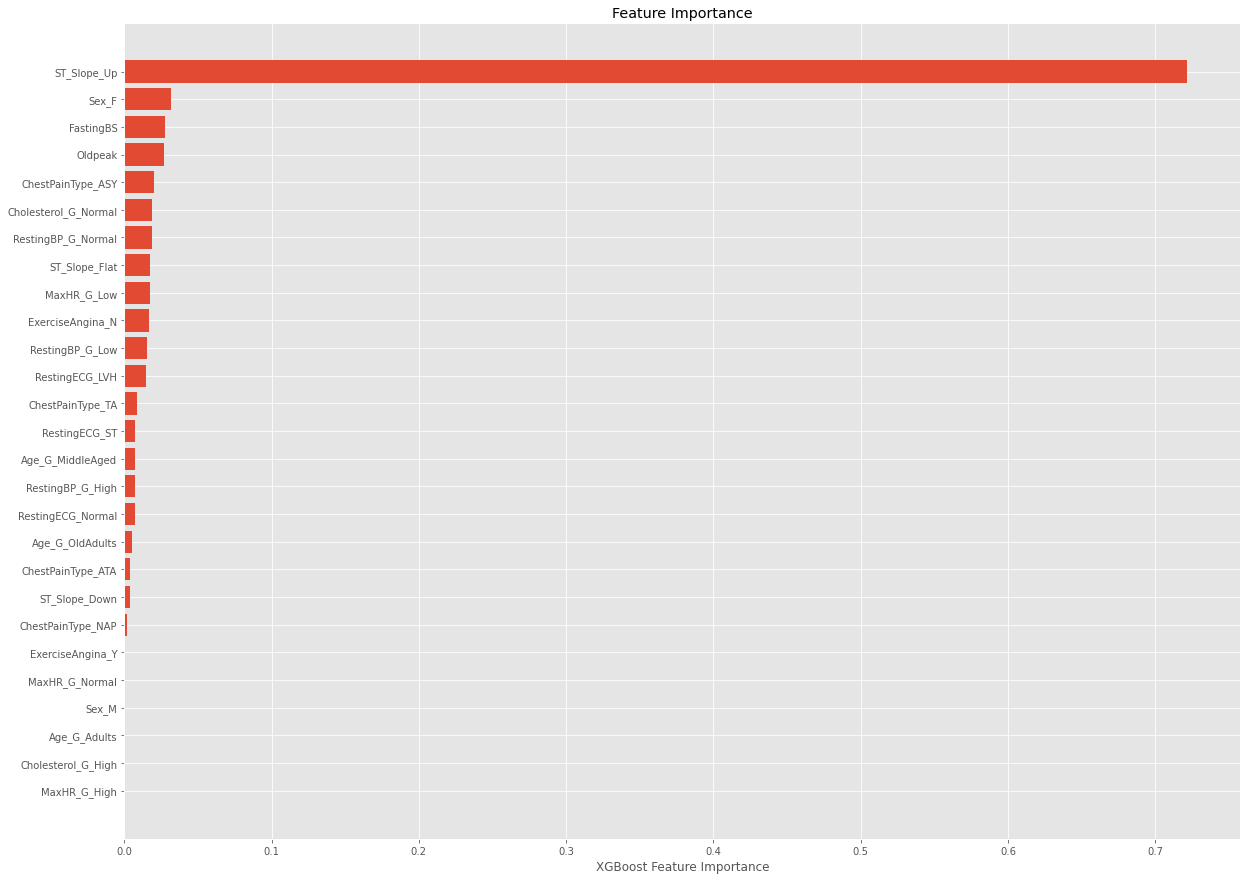

In [61]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[df_.columns.to_list()[i] for i in idxs])
plt.xlabel("XGBoost Feature Importance")

plt.show()

## 8- using NN

In [62]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" ## to run code on cpu rather than GPU  

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy



In [63]:
physical_devices = tf.config.experimental.list_physical_devices()
print ( len(physical_devices))

1


In [65]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)


16/16 [==============================] - 0s 533us/step - loss: 1.1465 - accuracy: 0.8253


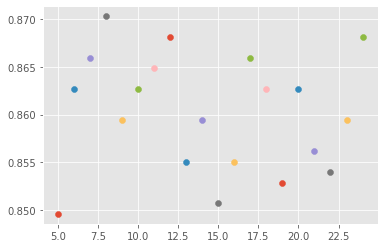

In [69]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]
acc_log.clear()



for lay2 in range ( 5 , 25):


    tf.random.set_seed(42)

    model = Sequential([
    Dense(units= 33, input_shape=(27,) , activation ='relu'),
    Dense(units=lay2, activation ='relu'),
    Dense ( units= 2 , activation = 'softmax') ])

    model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



    kf=model_selection.StratifiedKFold(n_splits=4)
    for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):

        X_train=df_.loc[trn_,df_.columns.to_list()]
        y_train=df_Copy.loc[trn_,target]

        X_valid=df_.loc[val_,df_.columns.to_list()]
        y_valid=df_Copy.loc[val_,target]

        ro_scaler=RobustScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_valid=ro_scaler.transform(X_valid)

        #print(f"fold: {fold+1} : ")

        model.fit(x=X_train , y=y_train,batch_size = 20 , epochs = 500,shuffle = False,verbose = 0, callbacks =[earlystopping]) 
        acc=model.evaluate(X_valid, y_valid, batch_size =15 , verbose = 1)






        acc_log.append(acc[1])



    avr_Acc =np.mean(acc_log) 

    plt.scatter(lay2,avr_Acc)
    acc_log.clear()



    

                

In [67]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]





tf.random.set_seed(42)

model = Sequential([
Dense(units= 33, input_shape=(27,) , activation ='relu'),
Dense(units=8, activation ='relu'),
Dense ( units= 2 , activation = 'softmax') ])

model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



kf=model_selection.StratifiedKFold(n_splits=4)
for fold , (trn_,val_) in enumerate(kf.split(X=df_Copy,y=y)):

    X_train=df_.loc[trn_,df_.columns.to_list()]
    y_train=df_Copy.loc[trn_,target]

    X_valid=df_.loc[val_,df_.columns.to_list()]
    y_valid=df_Copy.loc[val_,target]

    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    print(f"fold {fold+1} : ")

    model.fit(x=X_train , y=y_train,batch_size = 20 , epochs = 500,shuffle = False,verbose = 0, callbacks =[earlystopping]) 
    acc=model.evaluate(X_valid, y_valid, batch_size =15 , verbose = 1)






    acc_log.append(acc[1])



avr_Acc =np.mean(acc_log) 
print (f'\n\nThe avr accuracy is : {avr_Acc} ')


    

                

fold 1 : 
16/16 [==============================] - 0s 467us/step - loss: 0.2866 - accuracy: 0.9000
fold 2 : 
16/16 [==============================] - 0s 467us/step - loss: 0.2860 - accuracy: 0.8957
fold 3 : 
16/16 [==============================] - 0s 533us/step - loss: 0.3923 - accuracy: 0.8559
fold 4 : 
16/16 [==============================] - 0s 533us/step - loss: 0.7520 - accuracy: 0.8297


The avr accuracy is : 0.8703104257583618 
